# Pymaceuticals Inc.
---

### Analysis

- Write at least three observations or inferences that can be made from the data
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_supplemented = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
results_supplemented

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
len(results_supplemented["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoints = results_supplemented.loc[results_supplemented.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice_timepoints

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = results_supplemented.loc[results_supplemented["Mouse ID"] == duplicate_mice_timepoints[0]]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_sup_dedupe = results_supplemented.drop_duplicates(["Mouse ID"])
print(f'Mice in study: {len(results_sup_dedupe["Mouse ID"].unique())}')
results_sup_dedupe.head()

# This cell gets you the table that was present in the starter file. 
# The following cell gets you the table needed to complete the rest of the notebook

Mice in study: 249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_sup_dedupe = results_supplemented.drop(duplicate_mice.index)
# results_sup_dedupe = results_supplemented.drop_duplicates(["Mouse ID", "Timepoint"], keep=False)  # Alternative to get same df
print(f'Mice in study: {len(results_sup_dedupe["Mouse ID"].unique())}')
results_sup_dedupe.head()

Mice in study: 248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(results_sup_dedupe["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_group = results_sup_dedupe.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# mean, 
tumor_mean = tumor_group.mean()
# median, 
tumor_median = tumor_group.median()
# variance, 
tumor_variance = tumor_group.var()
# standard deviation, 
tumor_stdev = tumor_group.std()
# and SEM of the tumor volume. 
tumor_sem = tumor_group.sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stdev,
    "Tumor Volume Std. Err.": tumor_sem
})

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_group.aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

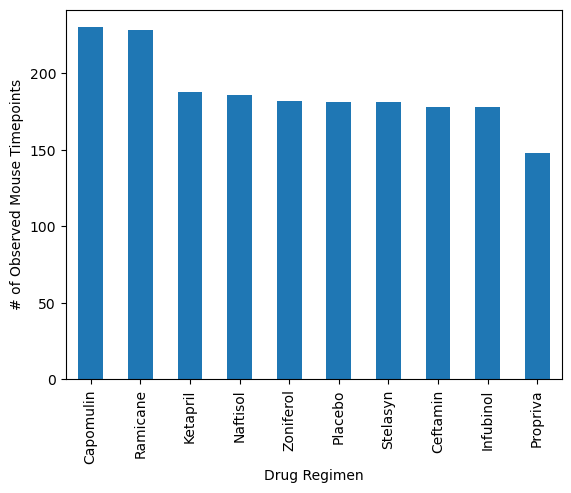

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
tumor_pandas = tumor_group.count() \
                        .sort_values(ascending=False) \
                        .plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

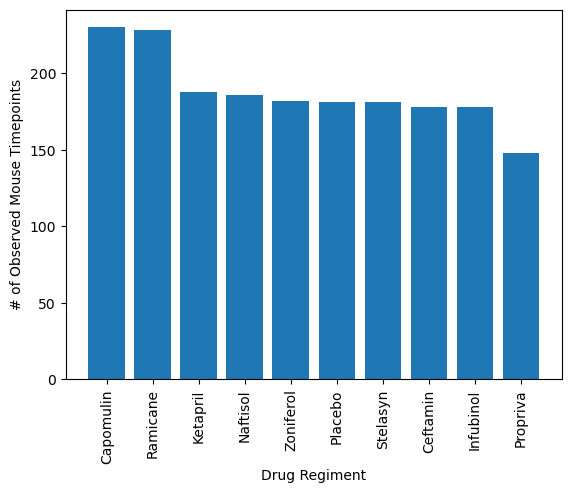

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y = [x for x in range(len(tumor_group))]
x = tumor_group.count().sort_values(ascending=False)
plt.bar(y, x)
plt.xlabel("Drug Regiment")
plt.xticks(y, x.index, rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

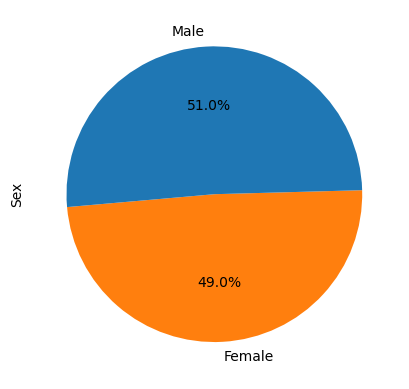

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_by_sex = results_sup_dedupe.groupby("Sex")["Mouse ID"].count()
count_by_sex.name = "Sex"

cxs_plot = count_by_sex.plot(kind="pie", autopct="%1.1f%%", startangle=185, colors=["#ff7f0e","#1f77b4"])

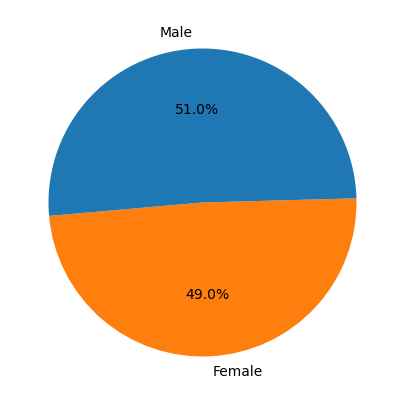

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots(figsize = [6,5])
ax1.pie(count_by_sex, labels=count_by_sex.index,
        autopct="%1.1f%%", colors=["#ff7f0e","#1f77b4"], startangle=185)
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_tp = results_sup_dedupe.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_max_sup = pd.merge(mouse_max_tp, results_sup_dedupe, on=["Mouse ID", "Timepoint"], how="left")
cric = mouse_max_sup.loc[(mouse_max_sup["Drug Regimen"] == "Capomulin") |
                        (mouse_max_sup["Drug Regimen"] == "Ramicane") |
                        (mouse_max_sup["Drug Regimen"] == "Infubinol") |
                        (mouse_max_sup["Drug Regimen"] == "Ceftamin")]
cric = cric.reset_index(drop=True)

In [142]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    trials = cric.loc[cric["Drug Regimen"] == treatment]
    
    # add subset 
    tumor_vol_data.append(trials["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = trials["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    iqr = quartiles[.75] - quartiles[.25]
    bounds= {
        "upper": quartiles[.75] + (1.5 * iqr),
        "lower": quartiles[.25] - (1.5 * iqr)
    }
    
    outliers = trials.loc[(trials["Tumor Volume (mm3)"] > bounds["upper"]) |
                         (trials["Tumor Volume (mm3)"] < bounds["lower"])]["Tumor Volume (mm3)"]
    
    print(f"{treatment}'s IQR: {round(quartiles[.25],1)} - {round(quartiles[.75],1)} with potential outliers: {outliers}")
    # print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's IQR: 32.4 - 40.2 with potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 31.6 - 40.7 with potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR: 54.0 - 65.5 with potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR: 48.7 - 64.3 with potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


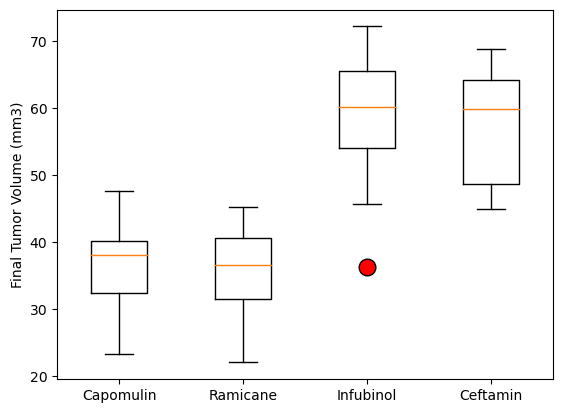

In [143]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
ticks = [x+1 for x in range(len(treatments))]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops={"markerfacecolor":"r", "markersize": 12})
plt.show()

## Line and Scatter Plots

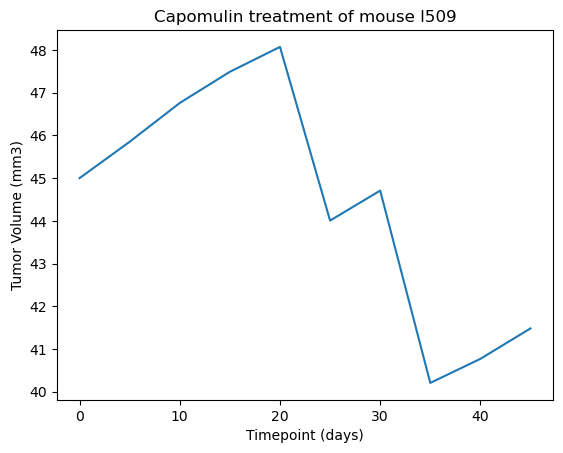

In [154]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = results_sup_dedupe.loc[results_sup_dedupe["Mouse ID"] == "l509", ["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(l509["Timepoint"], l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

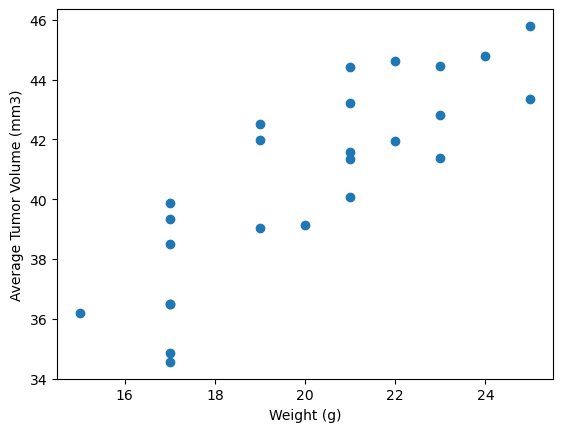

In [179]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_reg = results_sup_dedupe.loc[results_sup_dedupe["Drug Regimen"] == "Capomulin"]
capomulin_by_mouse = capomulin_reg.groupby("Mouse ID").mean(numeric_only=True)

weights = capomulin_by_mouse["Weight (g)"]
vols = capomulin_by_mouse["Tumor Volume (mm3)"]

plt.scatter(weights, vols)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


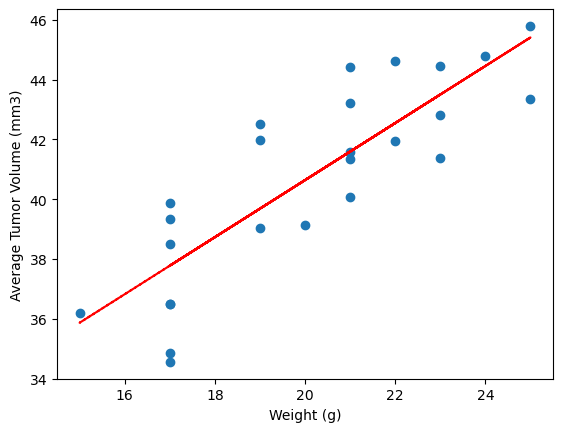

In [187]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation
correlation = st.pearsonr(weights, vols)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(weights, vols)
fit = slope *weights + intercept

# plot
plt.scatter(weights, vols)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weights, fit, "--", color="r")
plt.show()